<a href="https://colab.research.google.com/github/kachidiniru/Projects/blob/main/Fraud_Detection_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
from google.colab import files # import the file into googlecolab
uploaded = files.upload()

Saving Fraud Detection Analysis.csv to Fraud Detection Analysis.csv


In [ ]:
fraud_detect = pd.read_csv('Fraud Detection Analysis.csv')
fraud_detect.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
fraud_detect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [ ]:
fraud_detect.shape

(1048575, 11)

In [ ]:
fraud_detect.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03,0.0
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00,0.0
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00,0.0
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0


to check for doplicate rows

In [ ]:
duplicate_rows_fraud_detect = fraud_detect[fraud_detect.duplicated()]
print("number of duplicate rows: ", duplicate_rows_fraud_detect.shape)
# there are no duplicate rows

number of duplicate rows:  (0, 11)


In [ ]:
fraud_detect.count()

step              1048575
type              1048575
amount            1048575
nameOrig          1048575
oldbalanceOrg     1048575
newbalanceOrig    1048575
nameDest          1048575
oldbalanceDest    1048575
newbalanceDest    1048575
isFraud           1048575
isFlaggedFraud    1048575
dtype: int64

Handling missing data

In [ ]:
print(fraud_detect.isnull().sum())


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


to see data distriution for numerical features

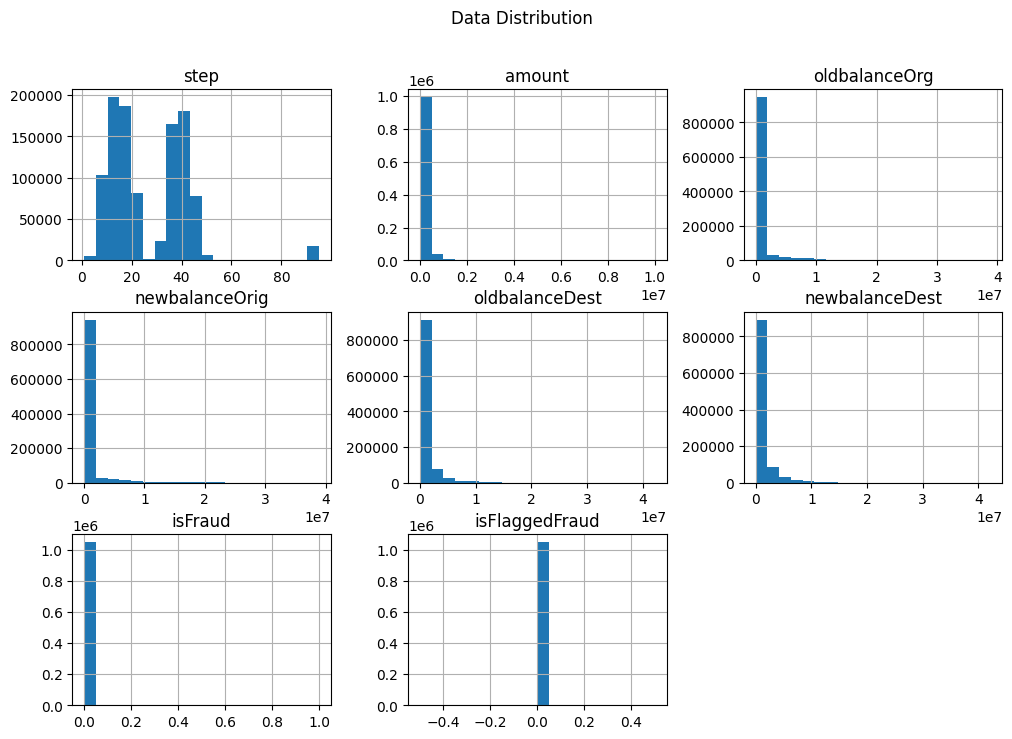

In [ ]:
fraud_detect.drop(['type'], axis=1).hist(bins=20, figsize=(12, 8))
plt.suptitle('Data Distribution')
plt.show()

to count the number of fraud and non-fraud cases

In [ ]:
fraud_counts = fraud_detect['isFraud'].value_counts()
print(f"Class Distribution:\n{fraud_counts}")

Class Distribution:
0    1047433
1       1142
Name: isFraud, dtype: int64


to visualize the class distribution of isFraud

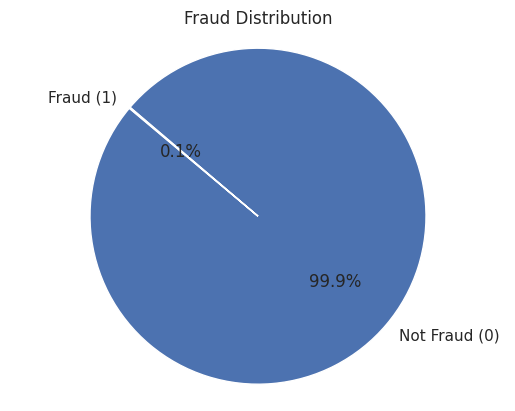

In [ ]:
raud_counts = fraud_detect['isFraud'].value_counts()
labels = ['Not Fraud (0)', 'Fraud (1)']
plt.pie(fraud_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Fraud Distribution')

plt.show()

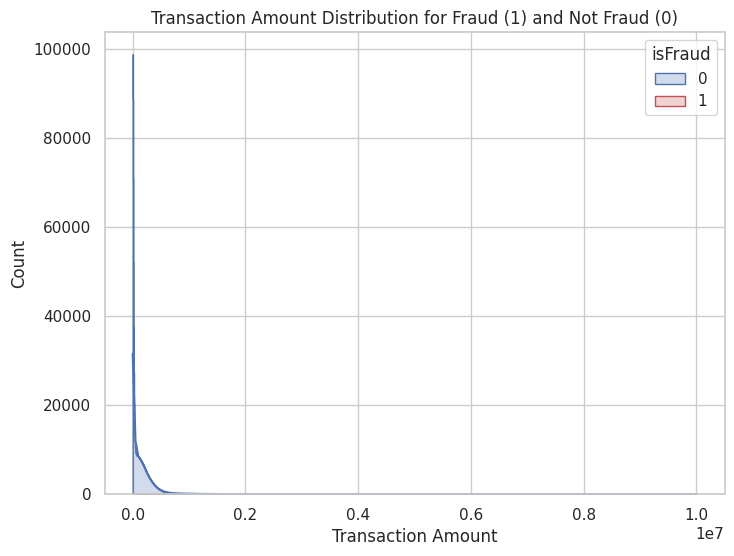

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.histplot(fraud_detect, x='amount', hue='isFraud', kde=True, element="step", common_norm=False, palette={0: 'b', 1: 'r'})
plt.title('Transaction Amount Distribution for Fraud (1) and Not Fraud (0)')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')

plt.show()

to see transaction type distribution

In [ ]:
transaction_type_counts = fraud_detect['type'].value_counts()
print(f"Transaction Type Distribution:\n{transaction_type_counts}")

Transaction Type Distribution:
CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64


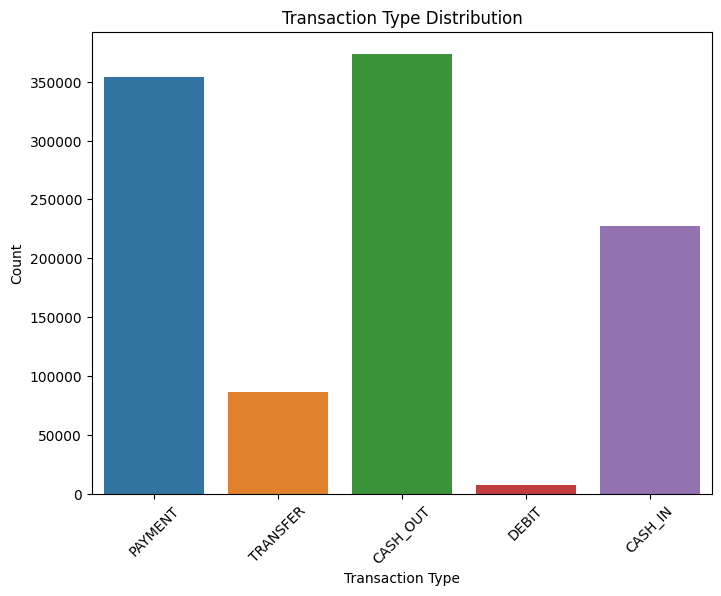

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=fraud_detect, x='type')
plt.title('Transaction Type Distribution')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

Calculate and visualize the correlation between numerical features

<ipython-input-15-9fe34290946b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = fraud_detect.corr()


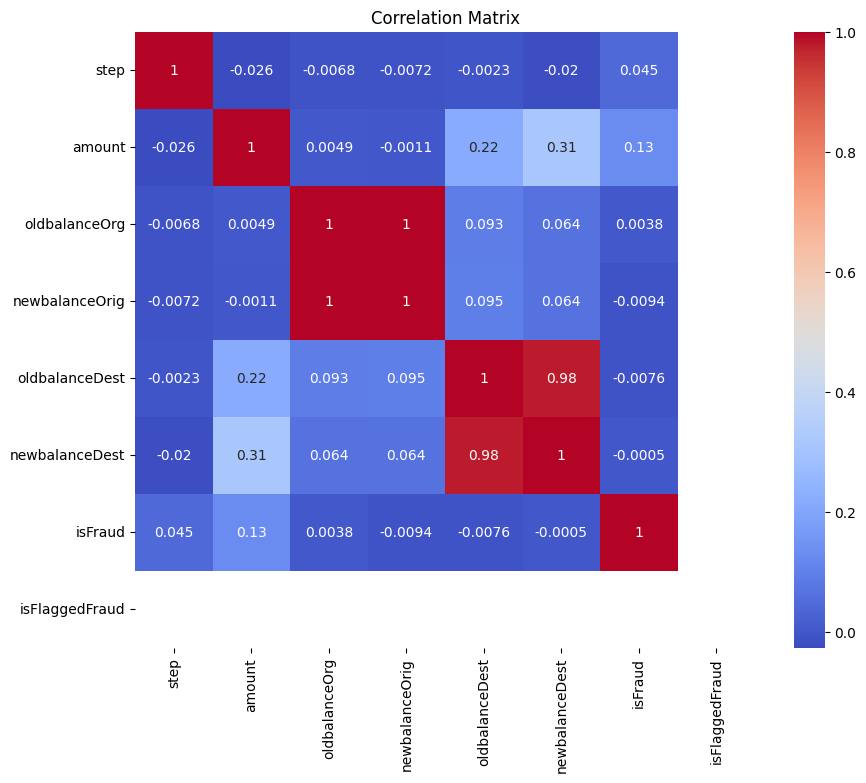

In [ ]:
correlation_matrix = fraud_detect.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Pairplot for  numerical features

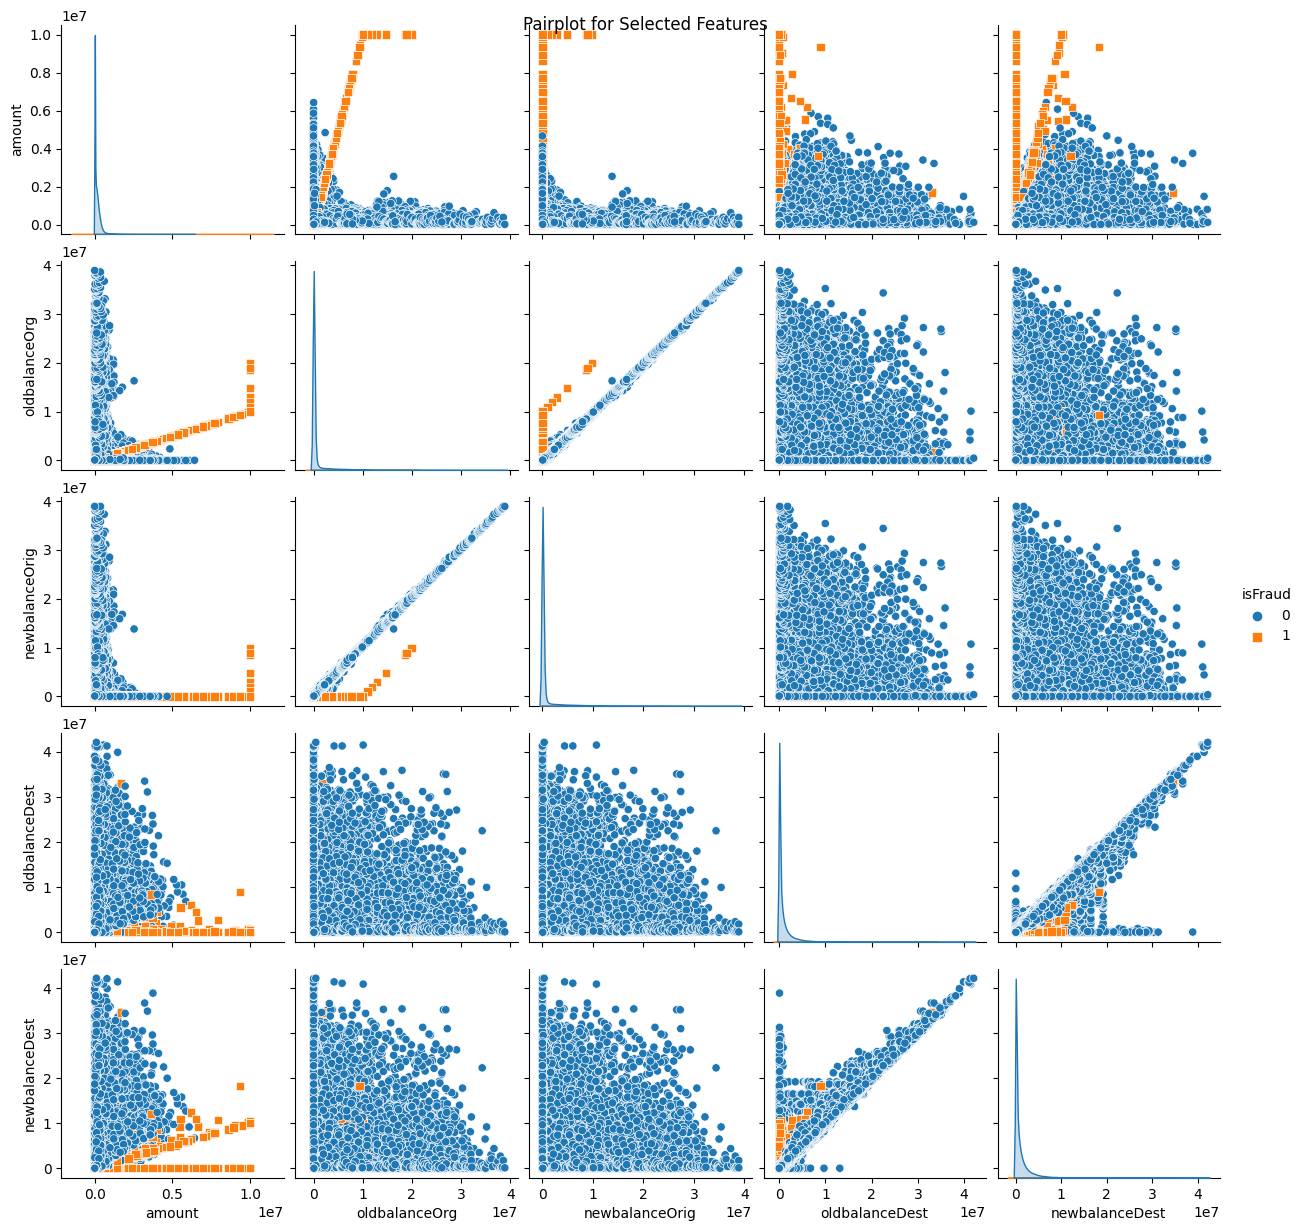

In [ ]:
sns.pairplot(fraud_detect[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']],
             hue='isFraud', markers=["o", "s"])
plt.suptitle('Pairplot for Selected Features')
plt.show()

Feature Selection
#Select relevant features (excluding target and unnecessary columns)

transform the type variable into numeric

In [ ]:
fraud_detect["type_2"] = fraud_detect["type"].replace({"PAYMENT":1,"CASH_OUT":2,"DEBIT":3,"CASH_IN":4,"TRANSFER":5})

In [ ]:
selected_features = fraud_detect[["type_2", "amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]]
selected_features


,type_2,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,9839.64,170136.00,160296.36,0.00,0.00
1,1,1864.28,21249.00,19384.72,0.00,0.00
2,5,181.00,181.00,0.00,0.00,0.00
3,2,181.00,181.00,0.00,21182.00,0.00
4,1,11668.14,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...,...
1048570,2,132557.35,479803.00,347245.65,484329.37,616886.72
1048571,1,9917.36,90545.00,80627.64,0.00,0.00
1048572,1,14140.05,20545.00,6404.95,0.00,0.00
1048573,1,10020.05,90605.00,80584.95,0.00,0.00


In [ ]:
X = selected_features
y = fraud_detect['isFraud'] #target variable

Split the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,type_2,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
408561,2,268368.06,0.00,0.00,321935.64,394821.43
70143,1,3834.08,6654.43,2820.35,0.00,0.00
708782,2,439022.46,482902.96,43880.51,490820.05,929842.51
572694,1,13542.02,929.00,0.00,0.00,0.00
774181,1,14555.34,0.00,0.00,0.00,0.00


Initializing and train the XGBoost classifier

In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
print("Size x_train: ", X_train.shape)
print("Size x_test: ", X_test.shape)

Size x_train:  (838860, 6)
Size x_test:  (209715, 6)


Make predictions on the test set

In [ ]:
y_pred = model.predict(X_test)

Calculate and print accuracy

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


Generate a classification report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209491
           1       0.95      0.73      0.82       224

    accuracy                           1.00    209715
   macro avg       0.97      0.86      0.91    209715
weighted avg       1.00      1.00      1.00    209715



Generate a confusion matrix

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[209482      9]
 [    61    163]]


to buid a random forest classification model

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

train the model

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

To Make predictions on the test data

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

To Evaluate the model

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9996519085425458


Although the accuracy for both methods are high and shows the model performed extremely well in terms of correct fraud prediction, it is important however, to consider other metrics as well that might not have been given and also due to class imbalance